In [32]:
import numpy as np
import json
import slowquant.SlowQuant as sq
from slowquant.unitary_coupled_cluster.ucc_wavefunction import WaveFunctionUCC

import pyscf
from pyscf import mcscf, ao2mo
#ccpvtz, ccpvqz

geometries = ["""H 0.0 0.0 -0.3; H 0.0 0.0 0.3;""", 
             """H 0.0 0.0 -0.35; H 0.0 0.0 0.35;""",
             """H 0.0 0.0 -0.4; H 0.0 0.0 0.4;""",
             """H 0.0 0.0 -0.45; H 0.0 0.0 0.45;""",
             """H 0.0 0.0 -0.5; H 0.0 0.0 0.5;""",
             """H 0.0 0.0 -0.75; H 0.0 0.0 0.75;""",
             """H 0.0 0.0 -1.0; H 0.0 0.0 1.0;""",
             """H 0.0 0.0 -1.25; H 0.0 0.0 1.25;""",
             """H 0.0 0.0 -1.5; H 0.0 0.0 1.5;""",
             """H 0.0 0.0 -1.75; H 0.0 0.0 1.75;""",
             """H 0.0 0.0 -2.0; H 0.0 0.0 2.0;""",
             """H 0.0 0.0 -2.25; H 0.0 0.0 2.25;""",
             """H 0.0 0.0 -2.5; H 0.0 0.0 2.5;""",
             """H 0.0 0.0 -3.0; H 0.0 0.0 3.0;""",]#Angstrom

results_true = []
results_false = []

basis = "cc-pvtz"
cas = (2, 10) # active space
unit = "angstrom"  #angstrom, bohr

for i, geometry in enumerate(geometries):
    print(f"\nProcessing geometry {i+1}:")
    print(geometry)
    #### SlowQuant
    SQobj = sq.SlowQuant()
    SQobj.set_molecule(geometry, distance_unit=unit)
    #SQobj.set_basis_set(basis)

    #### PySCF
    mol = pyscf.M(atom = geometry, basis = basis, unit = unit)
    mf = mol.RHF().run()

    #### HF 
    mo_coeffs = mf.mo_coeff

    #### get the integrals in the AO basis
    hcore_ao = mol.intor_symmetric('int1e_kin') + mol.intor_symmetric('int1e_nuc')
    eri_4fold_ao = mol.intor('int2e_sph')

    # OO-UCCSD
    WF = WaveFunctionUCC(
    num_elec=SQobj.molecule.number_electrons,
    cas=cas,
    mo_coeffs=mo_coeffs,
    h_ao=hcore_ao,
    g_ao=eri_4fold_ao,
    excitations="SD",
    include_active_kappa=True,
    )
    
    WF_false = WF
    WF_true = WF
    
    WF_true.run_wf_optimization_1step(
   		 optimizer_name="SLSQP", 
   		 tol = 1e-8,
   		 orbital_optimization=True)
    
    WF_false.run_wf_optimization_1step(
    		optimizer_name="SLSQP", 
    		tol = 1e-8,
    		orbital_optimization=False)
   
    energy_true = WF_true.energy_elec + mol.energy_nuc()
    energy_false = WF_false.energy_elec + mol.energy_nuc()

    print(f"oo-UCCSD energy for geometry {i+1} = {energy_true}")
    
    print(f"UCCSD energy for geometry {i+1} = {energy_false}")

    
    results_true.append({
        'geometry': geometry,
        'energy': energy_true,
        'nuclear_repulsion': mol.energy_nuc(),
        'electronic_energy': WF_true.energy_elec
    })
    
    results_false.append({
        'geometry': geometry,
        'energy': energy_false,
        'nuclear_repulsion': mol.energy_nuc(),
        'electronic_energy': WF_false.energy_elec
    })

   # with open('results_false_pvtz_H2.json', 'w') as f:
    #    json.dump(results_false, f, indent=4)  
    
    #with open('results_true_pvtz_H2.json', 'w') as f:
     #   json.dump(results_true, f, indent=4)  



Processing geometry 1:
H 0.0 0.0 -0.3; H 0.0 0.0 0.3;
converged SCF energy = -1.11540968365319
### Parameters information:
### Number kappa: 225
### Number theta1: 9
### Number theta2: 45
### Number theta3: 0
### Number theta4: 0
### Number theta5: 0
### Number theta6: 0
### Total parameters: 279

Iteration # | Iteration time [s] | Electronic energy [Hartree]
--------     1      |         3.58       |     -1.8308628133548428    
--------     2      |         8.88       |     -1.9949758613102604    
--------     3      |        20.79       |     -2.0118721495760927    
--------     4      |        19.23       |     -2.0082457405138872    
--------     5      |        21.03       |     -2.0077855424463671    
--------     6      |        19.94       |     -2.0137191437840292    
--------     7      |        22.23       |     -2.0181591354571360    
--------     8      |        15.85       |     -1.9903055803582064    
--------     9      |        15.04       |     -2.0240974748948473   

In [5]:
import json

### CC-PVDZ
with open('results_true_pvdz_H2.json', 'r') as f:
    loaded_results_true_pvdz_H2 = json.load(f)

with open('results_false_pvdz_H2.json', 'r') as f:
    loaded_results_false_pvdz_H2 = json.load(f)

print(f'Results for CC-PVDZ')
print()
print(loaded_results_true_pvdz_H2)
print()
print(loaded_results_false_pvdz_H2) 



Results for CC-PVDZ

[{'geometry': 'H 0.0 0.0 -0.3; H 0.0 0.0 0.3;', 'energy': -1.1391732926525802, 'nuclear_repulsion': 0.8819620182000001, 'electronic_energy': -2.0211353108525802}, {'geometry': 'H 0.0 0.0 -0.35; H 0.0 0.0 0.35;', 'energy': -1.1609046798058227, 'nuclear_repulsion': 0.7559674441714287, 'electronic_energy': -1.9168721239772513}, {'geometry': 'H 0.0 0.0 -0.4; H 0.0 0.0 0.4;', 'energy': -1.162750760345864, 'nuclear_repulsion': 0.66147151365, 'electronic_energy': -1.824222273995864}, {'geometry': 'H 0.0 0.0 -0.45; H 0.0 0.0 0.45;', 'energy': -1.1540817044694682, 'nuclear_repulsion': 0.5879746788, 'electronic_energy': -1.7420563832694682}, {'geometry': 'H 0.0 0.0 -0.5; H 0.0 0.0 0.5;', 'energy': -1.1400734791679352, 'nuclear_repulsion': 0.52917721092, 'electronic_energy': -1.6692506900879351}, {'geometry': 'H 0.0 0.0 -0.75; H 0.0 0.0 0.75;', 'energy': -1.0615349493458015, 'nuclear_repulsion': 0.35278480728, 'electronic_energy': -1.4143197566258014}, {'geometry': 'H 0.0 0.0

In [6]:
### CC-PVTZ

with open('results_true_pvtz_H2.json', 'r') as f:
    loaded_results_true_pvtz_H2 = json.load(f)

with open('results_false_pvtz_H2.json', 'r') as f:
    loaded_results_false_pvtz_H2 = json.load(f)

print()
print(f'Results for CC-PVTZ')
print()
print(loaded_results_true_pvtz_H2)
print()
print(loaded_results_false_pvtz_H2) 


Results for CC-PVTZ

[{'geometry': 'H 0.0 0.0 -0.3; H 0.0 0.0 0.3;', 'energy': -1.1518561397185942, 'nuclear_repulsion': 0.8819620182000001, 'electronic_energy': -2.0338181579185943}, {'geometry': 'H 0.0 0.0 -0.35; H 0.0 0.0 0.35;', 'energy': -1.169448817594577, 'nuclear_repulsion': 0.7559674441714287, 'electronic_energy': -1.9254162617660056}, {'geometry': 'H 0.0 0.0 -0.4; H 0.0 0.0 0.4;', 'energy': -1.168973159014975, 'nuclear_repulsion': 0.66147151365, 'electronic_energy': -1.830444672664975}, {'geometry': 'H 0.0 0.0 -0.45; H 0.0 0.0 0.45;', 'energy': -1.1591258653114773, 'nuclear_repulsion': 0.5879746788, 'electronic_energy': -1.7471005441114773}, {'geometry': 'H 0.0 0.0 -0.5; H 0.0 0.0 0.5;', 'energy': -1.1446285037919317, 'nuclear_repulsion': 0.52917721092, 'electronic_energy': -1.6738057147119318}, {'geometry': 'H 0.0 0.0 -0.75; H 0.0 0.0 0.75;', 'energy': -1.0657169557084665, 'nuclear_repulsion': 0.35278480728, 'electronic_energy': -1.4185017629884664}, {'geometry': 'H 0.0 0.0

In [9]:
import os
from qiskit_nwchem_driver.nwchem2yaml import extract_fields
from qiskit_nwchem_driver import nwchem_driver
import yaml
from pyscf import fci
import matplotlib.pyplot as plt
import numpy as np

covos = [1, 2, 4, 8, 10, 12, 18]

for covo in covos:
    print('{} COVOs'.format(covo))
    # we start by defining the paths to the files
    data_dir_nwchem = os.path.join("..","data","H2","data_h2_pw", "3x3_aperiodic", '{}covo'.format(covo))
    data_dir_yaml = os.path.join("..","data","H2","data_h2_pw", "3x3_aperiodic", '{}covo_yaml'.format(covo))
    if not os.path.exists(data_dir_yaml): # we create a pathto store yaml files if it doesn't exist
        os.makedirs(os.path.join("..","data","H2","data_h2_pw", "3x3_aperiodic", '{}covo_yaml'.format(covo)))
    data_files = os.listdir(data_dir_nwchem) # this include all the files in data_dir_nwchem
    bond_distances = []


    for data_file in data_files:
        if data_file.find('out') == -1: # we only use those with .out in the name, the output files
            continue
        # define some values to build the name of the .yaml file   
        temp = data_file.split('-')
        temp1 = temp[1].split('.')
        bond_distance = float(temp1[0] +'.'+ temp1[1])
        bond_distances.append(bond_distance)
        name = temp[0] + '-' + str(bond_distance)
        print("========= Bond distance: {} =========".format(bond_distance))
        data_file_yaml = os.path.join(data_dir_yaml, "{}.yaml".format(name))  # create the empty .yaml file in data_dir_yaml   
        
        data = extract_fields(os.path.join(data_dir_nwchem,data_file)) # data extracts the information from the output file 
        
        with open(data_file_yaml, 'w') as f:
            f.write(yaml.dump(data, default_flow_style=False)) # we write the extracted data into the .yaml file so we can work with it
            

1 COVOs
========= Bond distance: 1.0 =========
========= Bond distance: 0.7 =========
========= Bond distance: 0.9 =========
========= Bond distance: 3.5 =========
========= Bond distance: 6.0 =========
========= Bond distance: 2.0 =========
========= Bond distance: 2.5 =========
========= Bond distance: 3.0 =========
========= Bond distance: 5.0 =========
========= Bond distance: 4.0 =========
========= Bond distance: 0.6 =========
========= Bond distance: 4.5 =========
========= Bond distance: 0.8 =========
========= Bond distance: 1.5 =========
2 COVOs
========= Bond distance: 1.0 =========
========= Bond distance: 0.7 =========
========= Bond distance: 0.9 =========
========= Bond distance: 3.5 =========
========= Bond distance: 6.0 =========
========= Bond distance: 2.0 =========
========= Bond distance: 2.5 =========
========= Bond distance: 3.0 =========
========= Bond distance: 5.0 =========
========= Bond distance: 4.0 =========
========= Bond distance: 0.6 =========
=========

1 COVOs
========= Bond distance: 1.0 =========
-1.6566166738368624
========= Bond distance: 0.7 =========
-1.9091785697106851
========= Bond distance: 0.9 =========
-1.7292273035372618
========= Bond distance: 3.5 =========
-1.1309010079000004
========= Bond distance: 6.0 =========
-1.0689836963369417
========= Bond distance: 2.0 =========
-1.2725896421926537
========= Bond distance: 2.5 =========
-1.2002604725555361
========= Bond distance: 3.0 =========
-1.1575053818087229
========= Bond distance: 5.0 =========
-1.0821627347000002
========= Bond distance: 4.0 =========
-1.1109774664000005
========= Bond distance: 0.6 =========
-2.0194509794752973
========= Bond distance: 4.5 =========
-1.0954155946000004
========= Bond distance: 0.8 =========
-1.8127557721708287
========= Bond distance: 1.5 =========
-1.405949293644657
[-1.1274394248368624, -1.153211071110685, -1.1412525824372617, -0.9797075082000004, -0.9807874881669417, -1.0080010176926537, -0.9885895729555362, -0.9811129655087228,

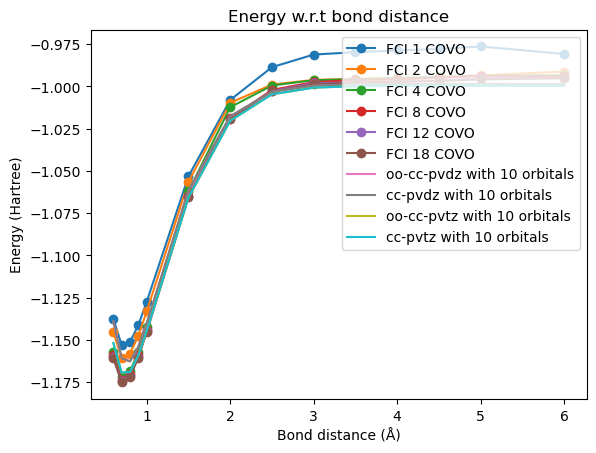

In [37]:
import os
from qiskit_nwchem_driver.nwchem2yaml import extract_fields
from qiskit_nwchem_driver import nwchem_driver
import yaml
from pyscf import fci
import matplotlib.pyplot as plt
import numpy as np


fcisolver = fci.direct_uhf.FCISolver()


covos = [1, 2, 4, 8, 10, 12, 18]
data_covos = {}
for covo in covos:
    print('{} COVOs'.format(covo))
    data_dir_nwchem = os.path.join("..","data","H2","data_h2_pw", "3x3_aperiodic", '{}covo'.format(covo))
    data_dir_yaml = os.path.join("..","data","H2","data_h2_pw", "3x3_aperiodic", '{}covo_yaml'.format(covo))
    if not os.path.exists(data_dir_yaml):
        os.makedirs(os.path.join("..","data","H2","data_h2_pw", "3x3_aperiodic", '{}covo_yaml'.format(covo)))
    data_files = os.listdir(data_dir_nwchem)
    bond_distances = []
    total_energies = []

    for data_file in data_files:
        if data_file.find('out') == -1:
            continue
        temp = data_file.split('-')
        temp1 = temp[1].split('.')
        bond_distance = float(temp1[0] +'.'+ temp1[1])
        bond_distances.append(bond_distance)
        name = temp[0] + '-' + str(bond_distance)
        print("========= Bond distance: {} =========".format(bond_distance))
        data_file_yaml = os.path.join(data_dir_yaml, "{}.yaml".format(name))
        data = extract_fields(os.path.join(data_dir_nwchem,data_file))
        with open(data_file_yaml, 'w') as f:
            f.write(yaml.dump(data, default_flow_style=False)) 
        
        driver = nwchem_driver.NWchem_Driver(data_file_yaml)
       
        n_electrons, n_spatial_orbitals, nuclear_repulsion_energy, h1, h2 = driver.load_from_yaml(data_file_yaml, include_spin=False)
     
        energy, coefficients = fcisolver.kernel(
            h1e=(h1, h1),  
            eri=(h2, h2, h2),  
            norb=n_spatial_orbitals,
            nelec=(1, 1),
            nroots=1
        )
        
        print(energy)
        
        total_energies.append(energy + nuclear_repulsion_energy)
    print(total_energies)

    total_energies = np.array(total_energies)
    bond_distances = np.array(bond_distances)

    sorted_indices = np.argsort(bond_distances)
    bond_distances = bond_distances[sorted_indices]
    total_energies = total_energies[sorted_indices]
    data_covos[covo] = np.array([bond_distances, total_energies])

with open('results_covo_H2.json', 'w') as f:
     json.dump(data_covos, f, indent=4)  

energies_true_pvdz_H2 = [result['energy'] for result in loaded_results_true_pvdz_H2]   
energies_false_pvdz_H2 = [result['energy'] for result in loaded_results_false_pvdz_H2]   
energies_true_pvtz_H2 = [result['energy'] for result in loaded_results_true_pvtz_H2]   
energies_false_pvtz_H2 = [result['energy'] for result in loaded_results_false_pvtz_H2]   

for covo in data_covos:
    plt.plot(data_covos[covo][0], data_covos[covo][1], 'o-', label=f'FCI {covo} COVO')
plt.plot(data_covos[covo][0],energies_true_pvdz_H2, 'x-',label='oo-cc-pvdz with 10 orbitals')
plt.plot(data_covos[covo][0],energies_false_pvdz_H2, label='cc-pvdz with 10 orbitals')
plt.plot(data_covos[covo][0],energies_true_pvtz_H2, 'x-', label='oo-cc-pvtz with 10 orbitals')
plt.plot(data_covos[covo][0],energies_false_pvtz_H2, label='cc-pvtz with 10 orbitals')
plt.legend(loc=1)
plt.xlabel('Bond distance (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('H2 Energy w.r.t bond distance')
#plt.ylim([-1.18,-0.8])
plt.savefig('H2_COVO.png')
plt.show()



In [4]:
energies_true_pvdz_H2 = [result['energy'] for result in loaded_results_true_pvdz_H2]   
energies_false_pvdz_H2 = [result['energy'] for result in loaded_results_false_pvdz_H2]   
energies_true_pvtz_H2 = [result['energy'] for result in loaded_results_true_pvtz_H2]   
energies_false_pvtz_H2 = [result['energy'] for result in loaded_results_false_pvtz_H2] 

for covo in data_covos:
    plt.plot(data_covos[covo][0], data_covos[covo][1], 'o-', label=f'PW FCI {covo} COVO')
plt.plot(data_covos[covo][0],energies_true_pvdz_H2, 'x-', label='oo-cc-pvdz with 10 orbitals')
plt.plot(data_covos[covo][0],energies_false_pvdz_H2, label='cc-pvdz with 10 orbitals')
plt.plot(data_covos[covo][0],energies_true_pvtz_H2, 'x-', label='oo-cc-pvtz with 10 orbitals')
plt.plot(data_covos[covo][0],energies_false_pvtz_H2, label='cc-pvtz with 10 orbitals')
plt.legend(loc=4)
plt.xlabel('Bond distance (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy w.r.t bond distance')
#plt.ylim([-1.18,-0.8])
plt.savefig('H2_COVO.png')
plt.show()

NameError: name 'data_covos' is not defined

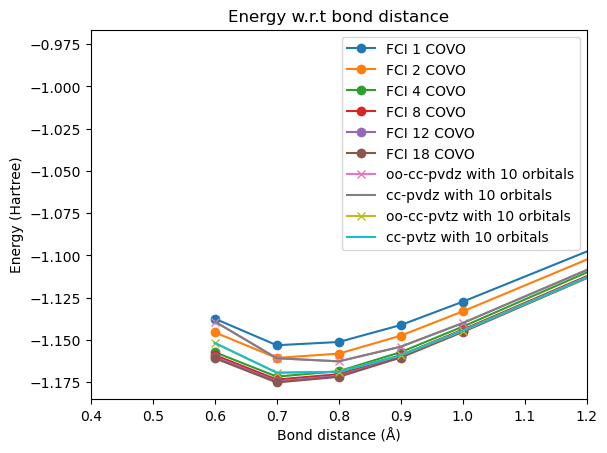

In [39]:
for covo in data_covos:
    plt.plot(data_covos[covo][0], data_covos[covo][1], 'o-', label=f'FCI {covo} COVO')
plt.plot(data_covos[covo][0],energies_true_pvdz_H2, 'x-', label='oo-cc-pvdz with 10 orbitals')
plt.plot(data_covos[covo][0],energies_false_pvdz_H2, label='cc-pvdz with 10 orbitals')
plt.plot(data_covos[covo][0],energies_true_pvtz_H2, 'x-',label='oo-cc-pvtz with 10 orbitals')
plt.plot(data_covos[covo][0],energies_false_pvtz_H2, label='cc-pvtz with 10 orbitals')
plt.legend(loc=1)
plt.xlabel('Bond distance (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy w.r.t bond distance')
#plt.ylim([-1.1,-0.978])
plt.xlim([0.4,1.2])
plt.savefig('H2_COVO_.png')
plt.show()


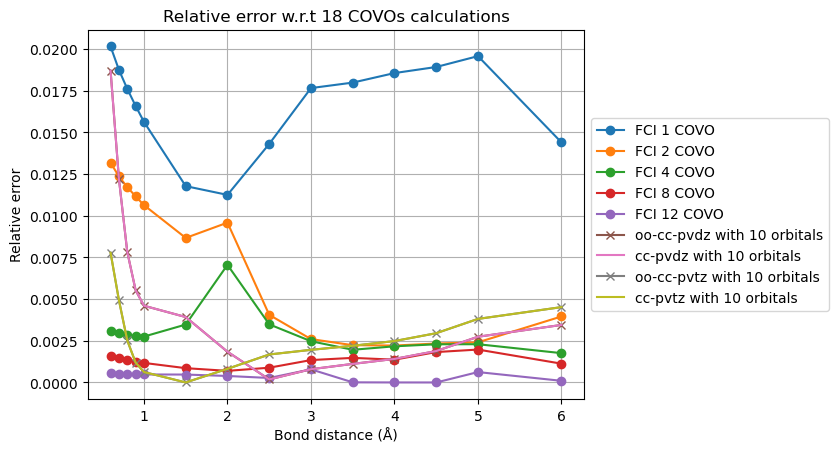

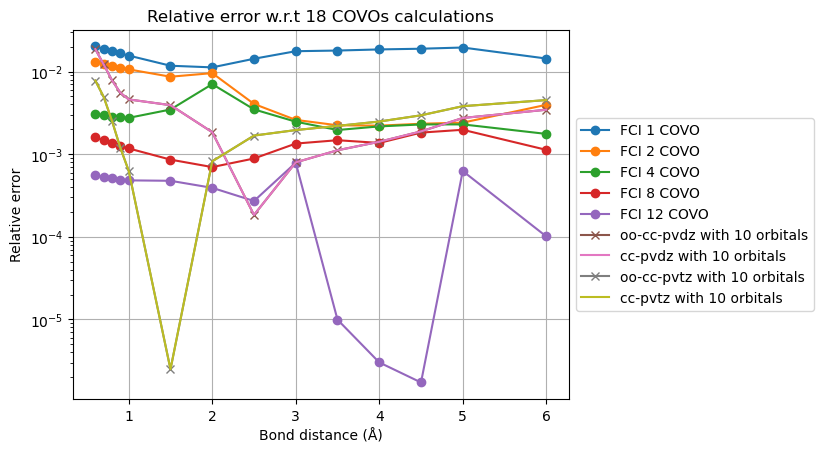

In [48]:
# Let's calculate de error vectores between oo-cc-pvdz and the rest

errors = {}

for covo in data_covos:
    if covo == 18: 
       continue
    errors[covo] = np.abs(data_covos[covo][1] - data_covos[18][1])/np.abs(data_covos[18][1])

error_true_ccpvdz_H2 = np.abs(energies_true_pvdz_H2 - data_covos[18][1])/np.abs(data_covos[18][1])
error_false_ccpvdz_H2 = np.abs(energies_false_pvdz_H2 - data_covos[18][1])/np.abs(data_covos[18][1])
error_true_ccpvtz_H2 = np.abs(energies_true_pvtz_H2 - data_covos[18][1])/np.abs(data_covos[18][1])
error_false_ccpvtz_H2 = np.abs(energies_false_pvtz_H2 - data_covos[18][1])/np.abs(data_covos[18][1])

for covo in errors:
    plt.plot(data_covos[covo][0], errors[covo], 'o-', label=f'FCI {covo} COVO')  
plt.plot(data_covos[covo][0], error_true_ccpvdz_H2, 'x-', label = 'oo-cc-pvdz with 10 orbitals')
plt.plot(data_covos[covo][0], error_false_ccpvdz_H2, label='cc-pvdz with 10 orbitals')
plt.plot(data_covos[covo][0], error_true_ccpvtz_H2, 'x-', label = 'oo-cc-pvtz with 10 orbitals')
plt.plot(data_covos[covo][0], error_false_ccpvtz_H2, label='cc-pvtz with 10 orbitals')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xlabel('Bond distance (Å)')
plt.ylabel('Relative error')
plt.title('Relative error w.r.t 18 COVOs calculations')
plt.savefig('error_covo.png')
plt.show()

for covo in errors:
    plt.semilogy(data_covos[covo][0], errors[covo], 'o-', label=f'FCI {covo} COVO')  
plt.semilogy(data_covos[covo][0], error_true_ccpvdz_H2, 'x-', label = 'oo-cc-pvdz with 10 orbitals')
plt.semilogy(data_covos[covo][0], error_false_ccpvdz_H2, label='cc-pvdz with 10 orbitals')
plt.semilogy(data_covos[covo][0], error_true_ccpvtz_H2, 'x-', label = 'oo-cc-pvtz with 10 orbitals')
plt.semilogy(data_covos[covo][0], error_false_ccpvtz_H2, label='cc-pvtz with 10 orbitals')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xlabel('Bond distance (Å)')
plt.ylabel('Relative error')
plt.title('Relative error w.r.t 18 COVOs calculations')
plt.savefig('error_covo.png')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


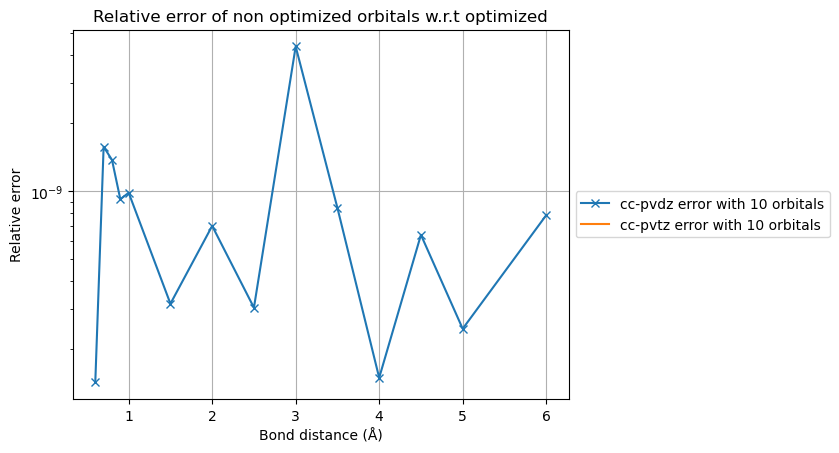

In [55]:
#how is the error of the non-optimized ccpvdz and ccpvtz

energies_true_pvdz_H2 = np.array(energies_true_pvdz_H2)
energies_false_pvdz_H2 = np.array(energies_false_pvdz_H2)
energies_true_pvtz_H2 = np.array(energies_true_pvtz_H2)
energies_false_pvtz_H2 = np.array(energies_false_pvtz_H2)

error_oo_ccpvdz = np.abs(energies_true_pvdz_H2 - energies_false_pvdz_H2)/np.abs(energies_true_pvdz_H2)
error_oo_ccpvtz = np.abs(energies_true_pvtz_H2 - energies_false_pvtz_H2)/np.abs(energies_true_pvtz_H2)

plt.semilogy(data_covos[covo][0], error_oo_ccpvdz, 'x-', label = 'cc-pvdz error with 10 orbitals')
plt.semilogy(data_covos[covo][0], error_oo_ccpvtz, label='cc-pvtz error with 10 orbitals')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xlabel('Bond distance (Å)')
plt.ylabel('Relative error')
plt.title('Relative error of non optimized orbitals w.r.t optimized')
plt.savefig('error_orbital.png')
plt.show()

In [ ]:
import os
from qiskit_nwchem_driver.nwchem2yaml import extract_fields
from qiskit_nwchem_driver import nwchem_driver
import yaml
from pyscf import fci
import matplotlib.pyplot as plt
import numpy as np


fcisolver = fci.direct_uhf.FCISolver()

covos = [1,2,4,8,10,12,18]

data_covos={}
for covo in covos:
    data_dir_yaml = os.path.join("..","data","H2","data_h2_pw", "3x3_aperiodic", '{}covo_yaml'.format(covo))
    data_files = os.listdir(data_dir_yaml)
    bond_distances = []
    total_energies_uccsd = []
    tota_energies_fci = []
    
    for data_file in data_files:
        
        temp = data_file.split('-')
        temp1 = temp[1].split('.')
        bond_distance = float(temp1[0] +'.'+ temp1[1])
        bond_distances.append(bond_distance)

        print("========= Bond distance: {} =========".format(bond_distance))
        
        driver = nwchem_driver.NWchem_Driver(data_file_yaml)
        n_electrons, n_spatial_orbitals, nuclear_repulsion_energy, h1, h2 = driver.load_from_yaml(data_file_yaml, include_spin=False)
     
        WF = WaveFunctionUCC(
            num_elec=n_electrons,
            cas=(2,10),
            mo_coeffs=np.identity(4),
            h_ao=h1,
            g_ao=h2,
            excitations="SD",
            include_active_kappa=True,
            )
        
        WF_true.run_wf_optimization_1step(
       	    optimizer_name="SLSQP", 
   		    tol = 1e-8,
   		    orbital_optimization=False)
        
        energy_fci, coefficients = fcisolver.kernel(
            h1e=(h1, h1),  
            eri=(h2, h2, h2),  
            norb=n_spatial_orbitals,
            nelec=(1, 1),
            nroots=1
        )

        total_energies_uccsd.append(WF.energy_elec + nuclear_repulsion_energy)
        total_energies_fci.append(energy_fci + nuclear_repulsion_energy)  
        
    total_energies_uccsd = np.array(total_energies_uccsd)
    bond_distances = np.array(bond_distances)
    total_energies_fci = np.array(total_energies_fci)

    sorted_indices = np.argsort(bond_distances)
    bond_distances = bond_distances[sorted_indices]
    total_energies_uccsd = total_energies_uccsd[sorted_indices]
    total_energies_fci = total_energies_fci[sorted_indices]

    data_covos[covo] = np.array([bond_distances, total_energies_uccsd, total_energies_fci])

with open('results_covo_H2.json', 'w') as f:
     json.dump(data_covos, f, indent=4)  

In [40]:
import numpy as np

import slowquant.SlowQuant as sq
from slowquant.unitary_coupled_cluster.ucc_wavefunction import WaveFunctionUCC

import pyscf
from pyscf import mcscf, ao2mo


geometry = """Li 0.0 0.0 -1.0; H 0.0 0.0 1.0;""" #Angstrom
basis = "cc-pvdz"
cas = (2, 4) # active space
unit = "angstrom"  #angstrom, bohr

#### SlowQuant
SQobj = sq.SlowQuant()
SQobj.set_molecule(geometry, distance_unit=unit,)
SQobj.set_basis_set(basis)

#### PySCF
mol = pyscf.M(atom = geometry, basis = basis, unit = unit)
mf = mol.RHF().run()

#### HF 
mo_coeffs = mf.mo_coeff
#print(mo_coeffs)
#print(mo_coeffs.shape)
#print(len(mo_coeffs))

#### get the integrals in the AO basis
hcore_ao = mol.intor_symmetric('int1e_kin') + mol.intor_symmetric('int1e_nuc')
eri_4fold_ao = mol.intor('int2e_sph')
#print(hcore_ao)

# OO-UCCSD
WF = WaveFunctionUCC(
num_elec=SQobj.molecule.number_electrons,
cas=cas,
mo_coeffs=mo_coeffs,
h_ao=hcore_ao,
g_ao=eri_4fold_ao,
excitations="SD",
include_active_kappa=True,
)

WF.run_wf_optimization_1step(
		optimizer_name="SLSQP", 
		tol = 1e-8,
		orbital_optimization=True)



print("oo-UCCSD energy =",WF.energy_elec + mol.energy_nuc())
print()
print("Now let's try to run it again but using the integrals in the MO basis, and not the AO.") 
print()

hcore_mo = np.einsum('pi,pq,qj->ij', mo_coeffs, hcore_ao, mo_coeffs)
eri_4fold_mo = ao2mo.incore.full(eri_4fold_ao, mo_coeffs)
mo_coeffs_ = np.identity(len(mo_coeffs))

# OO-UCCSD
WF_ = WaveFunctionUCC(
num_elec=SQobj.molecule.number_electrons,
cas=cas,
mo_coeffs=mo_coeffs_,
h_ao=hcore_mo,
g_ao=eri_4fold_mo,
excitations="SD",
include_active_kappa=True,
)

WF_.run_wf_optimization_1step(
		optimizer_name="SLSQP", 
		tol = 1e-8,
		orbital_optimization=True)

print("oo-UCCSD energy in MO representation = ",WF_.energy_elec + mol.energy_nuc())
print()
print("difference = ", WF.energy_elec-WF_.energy_elec)
 

converged SCF energy = -7.9720520404437
### Parameters information:
### Number kappa: 80
### Number theta1: 3
### Number theta2: 6
### Number theta3: 0
### Number theta4: 0
### Number theta5: 0
### Number theta6: 0
### Total parameters: 89

Iteration # | Iteration time [s] | Electronic energy [Hartree]
--------     1      |         0.24       |     -8.7660400757619339    
--------     2      |         0.18       |     -8.7660780401608491    
--------     3      |         0.21       |     -8.7660813168933274    
--------     4      |         0.19       |     -8.7660602393932319    
--------     5      |         0.36       |     -8.7659391846431980    
--------     6      |         0.30       |     -8.7661063866958209    
--------     7      |         0.29       |     -8.7662868895524539    
--------     8      |         0.24       |     -7.5972516316730481    
--------     9      |         0.56       |     -3.7168973427312726    
--------     10     |         0.70       |     -8.4689652

In [1]:
import numpy as np

import slowquant.SlowQuant as sq
from slowquant.unitary_coupled_cluster.ucc_wavefunction import WaveFunctionUCC

import pyscf
from pyscf import mcscf, ao2mo


geometry = """H 0.0 0.0 0.0; H 0.0 0.0 0.7414;""" #Angstrom
basis = "cc-pvdz"
cas = (2, 6) # active space
unit = "angstrom"  #angstrom, bohr

#### SlowQuant
SQobj = sq.SlowQuant()
SQobj.set_molecule(geometry, distance_unit=unit,)
SQobj.set_basis_set(basis)

#### PySCF
mol = pyscf.M(atom = geometry, basis = basis, unit = unit)
mf = mol.RHF().run()

#### HF 
mo_coeffs = mf.mo_coeff

#### get the integrals in the AO basis
hcore_ao = mol.intor_symmetric('int1e_kin') + mol.intor_symmetric('int1e_nuc')
eri_4fold_ao = mol.intor('int2e_sph')

# OO-UCCSD
WF = WaveFunctionUCC(
num_elec=SQobj.molecule.number_electrons,
cas=cas,
mo_coeffs=mo_coeffs,
h_ao=hcore_ao,
g_ao=eri_4fold_ao,
excitations="SD",
include_active_kappa=True,
)

WF.run_wf_optimization_1step(
		optimizer_name="SLSQP", 
		tol = 1e-8,
		orbital_optimization=True)



print("oo-UCCSD energy =",WF.energy_elec + mol.energy_nuc())
print()
print("Now let's try to run it again but using the integrals in the MO basis, and not the AO.") 
print()

hcore_mo = np.einsum('pi,pq,qj->ij', mo_coeffs, hcore_ao, mo_coeffs)
eri_4fold_mo = ao2mo.incore.full(eri_4fold_ao, mo_coeffs)
mo_coeffs_ = np.identity(len(mo_coeffs))


# OO-UCCSD
WF_ = WaveFunctionUCC(
num_elec=SQobj.molecule.number_electrons,
cas=cas,
mo_coeffs=mo_coeffs_,
h_ao=hcore_mo,
g_ao=eri_4fold_mo,
excitations="SD",
include_active_kappa=True,
)

WF_.run_wf_optimization_1step(
		optimizer_name="SLSQP", 
		tol = 1e-8,
		orbital_optimization=True)

print("oo-UCCSD energy in MO representation = ",WF_.energy_elec + mol.energy_nuc())
print()
print("difference = ", WF.energy_elec + mol.energy_nuc() - WF_.energy_elec - mol.energy_nuc() )


converged SCF energy = -1.12871495902965
### Parameters information:
### Number kappa: 39
### Number theta1: 5
### Number theta2: 15
### Number theta3: 0
### Number theta4: 0
### Number theta5: 0
### Number theta6: 0
### Total parameters: 59

Iteration # | Iteration time [s] | Electronic energy [Hartree]
--------     1      |         0.28       |     -1.5151245907563720    
--------     2      |         0.51       |     -1.8563689465780031    
--------     3      |         0.68       |     -1.8720083231584197    
--------     4      |         0.75       |     -1.8726324498992775    
--------     5      |         0.70       |     -1.8737407701247046    
--------     6      |         0.53       |     -1.8742175244194672    
--------     7      |         0.52       |     -1.8738397904950514    
--------     8      |         0.74       |     -1.8745393780503030    
--------     9      |         0.75       |     -1.8746873617324156    
--------     10     |         0.49       |     -1.87481